## Exercício de Aprofundamento - Trilha 7 

Faça as manipulações e explorações visuais de acordo com as perguntas que precisam ser respondidas

## Análise de dados da NFL 

Pacote do R: https://cran.r-project.org/web/packages/nflfastR/index.html

Este pacote permite que dados da NFL sejam analisados, jogada a jogada, habilitando diversos tipos de tomada de decisão a partir de manipulação dos dados e geração de gráficos.

Nesta atividade de aprofundamento, vamos explorar itens estudados tanto na trilha 6 com o pacote **Tidyverse** quanto na trilha 7 com o pacote **ggplot2**.

Algumas partes desta atividade já estão prontas, como por exemplo, o carregamento do conjunto de dados geral, a impressão dos escudos dos times e a segmentação de sub-conjuntos de dados para permitir uma manipulação mais simples na atividade.

Começamos então, com a instalação do pacote *nflfastR* e os carregamentos dos pacotes necessários.

In [1]:
install.packages("nflfastR")
#install.packages("ggimage")
install.packages("imager")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’, ‘snakecase’, ‘fastrmodels’, ‘furrr’, ‘future’, ‘janitor’, ‘progressr’, ‘xgboost’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridGraphics’, ‘yulab.utils’, ‘ggfun’, ‘ggplotify’, ‘magick’


Warning message in install.packages("ggimage"):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("ggimage"):
“installation of package ‘ggimage’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bmp’, ‘tiff’, ‘png’, ‘jpeg’, ‘readbitmap’, ‘downloader’, ‘igraph’




In [23]:
library(nflfastR)

library(tidyverse)
library(ggplot2)

library(imager)
#library(ggimage)

Como este pacote permite baixar dados de todas as temporadas, jogada a jogada, desde 1999, faremos um recorte apenas de 2014. A escolha deste ano foi aleatória, mesmo que possa parecer que foi escolhido de forma proposital por ser ultimo ano no qual *Seattle Seahawks* ganhou o *Super Bowl* (que é o jogo final da temporada e define o vencedor do campeonato). Fique a vontade para escolher qualquer outro ano, caso deseje estudar. 

>Contudo, para este exercício de aprofundamento, **mantenha o ano de 2014**.

In [9]:
temporada <- load_pbp(2014) #Carregamento dos dados, jogada a jogada, de 2014

Repare que para a seleção do subconjunto de dados, foi informado o ano da temporada desejado.

Poderiam ser um intervalo de outros anos, para isso, seria necessário definir o valor como **anoInicio:anoFim**, por exemplo: 2014:2018 e neste caso os dados seriam de 2014 até 2018.

> temporada <- load_pbp(2014:2018)

Repare que este conjunto de dados de pbp (*play-by-play* -- jogada a jogada) possui muitas variáveis. Ao chamar a função *names* colocando o nome do conjunto de dados, são retornadas todas as variáveis. Execute o bloco abaixo e conheça quais são estas variáveis.

In [10]:
names(temporada)

[1] "play_id"                             
  [2] "game_id"                             
  [3] "old_game_id"                         
  [4] "home_team"                           
  [5] "away_team"                           
  [6] "season_type"                         
  [7] "week"                                
  [8] "posteam"                             
  [9] "posteam_type"                        
 [10] "defteam"                             
 [11] "side_of_field"                       
 [12] "yardline_100"                        
 [13] "game_date"                           
 [14] "quarter_seconds_remaining"           
 [15] "half_seconds_remaining"              
 [16] "game_seconds_remaining"              
 [17] "game_half"                           
 [18] "quarter_end"                         
 [19] "drive"                               
 [20] "sp"                                  
 [21] "qtr"                                 
 [22] "down"                                
 [23] "goal_to_go"                          
 [24] "time"                                
 [25] "yrdln"                               
 [26] "ydstogo"                             
 [27] "ydsnet"                              
 [28] "desc"                                
 [29] "play_type"                           
 [30] "yards_gained"                        
 [31] "shotgun"                             
 [32] "no_huddle"                           
 [33] "qb_dropback"                         
 [34] "qb_kneel"                            
 [35] "qb_spike"                            
 [36] "qb_scramble"                         
 [37] "pass_length"                         
 [38] "pass_location"                       
 [39] "air_yards"                           
 [40] "yards_after_catch"                   
 [41] "run_location"                        
 [42] "run_gap"                             
 [43] "field_goal_result"                   
 [44] "kick_distance"                       
 [45] "extra_point_result"                  
 [46] "two_point_conv_result"               
 [47] "home_timeouts_remaining"             
 [48] "away_timeouts_remaining"             
 [49] "timeout"                             
 [50] "timeout_team"                        
 [51] "td_team"                             
 [52] "td_player_name"                      
 [53] "td_player_id"                        
 [54] "posteam_timeouts_remaining"          
 [55] "defteam_timeouts_remaining"          
 [56] "total_home_score"                    
 [57] "total_away_score"                    
 [58] "posteam_score"                       
 [59] "defteam_score"                       
 [60] "score_differential"                  
 [61] "posteam_score_post"                  
 [62] "defteam_score_post"                  
 [63] "score_differential_post"             
 [64] "no_score_prob"                       
 [65] "opp_fg_prob"                         
 [66] "opp_safety_prob"                     
 [67] "opp_td_prob"                         
 [68] "fg_prob"                             
 [69] "safety_prob"                         
 [70] "td_prob"                             
 [71] "extra_point_prob"                    
 [72] "two_point_conversion_prob"           
 [73] "ep"                                  
 [74] "epa"                                 
 [75] "total_home_epa"                      
 [76] "total_away_epa"                      
 [77] "total_home_rush_epa"                 
 [78] "total_away_rush_epa"                 
 [79] "total_home_pass_epa"                 
 [80] "total_away_pass_epa"                 
 [81] "air_epa"                             
 [82] "yac_epa"                             
 [83] "comp_air_epa"                        
 [84] "comp_yac_epa"                        
 [85] "total_home_comp_air_epa"             
 [86] "total_away_comp_air_epa"             
 [87] "total_home_comp_yac_epa"             
 [88] "total_away_comp_yac_epa"             
 [89] "total_home_raw_air_epa"            

Para conhecer os times que jogam na NFL, é possível ter um retorno de dados básicos dos cada um deles. Este retorno básico pode ser transformado em um data frame, para posteriormente, ser utilizado como filtro da estrutura.

In [11]:
times <- teams_colors_logos %>% unique()

In [12]:
names(times)

[1] "team_abbr"           "team_name"           "team_id"            
 [4] "team_nick"           "team_color"          "team_color2"        
 [7] "team_color3"         "team_color4"         "team_logo_wikipedia"
[10] "team_logo_espn"      "team_wordmark"

Aproveitando que estamos observando os times, é possível mostrar todos os seus escudos e nomes.
Para isso, execute o bloco de codigo abaixo, e veja como é a saída:

[1] "Arizona Cardinals >> ARI"
[1] "Atlanta Falcons >> ATL"


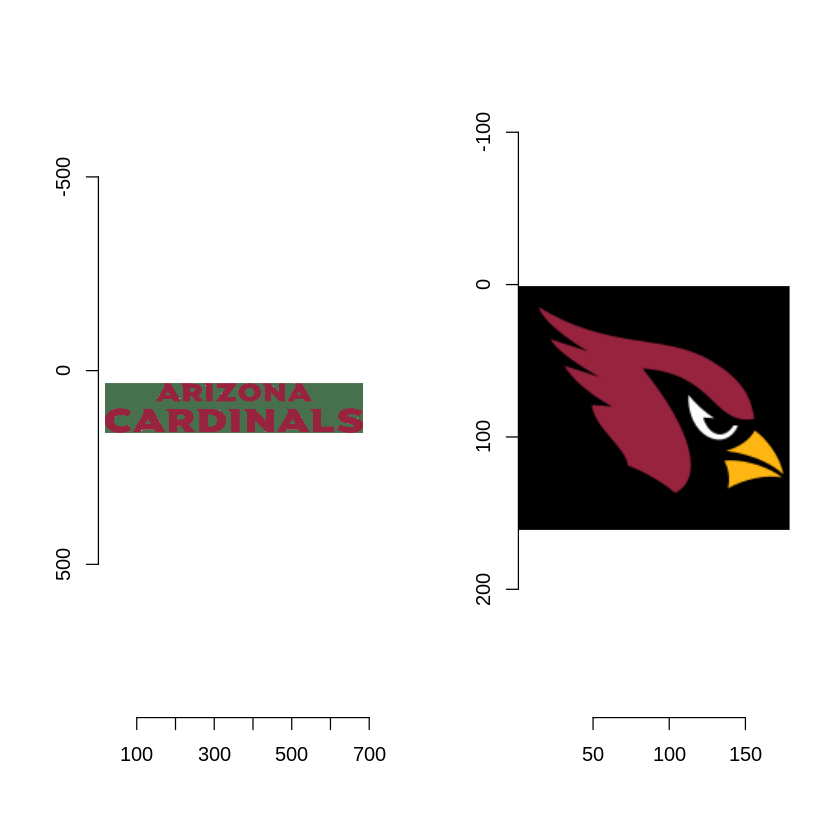

[1] "Baltimore Ravens >> BAL"


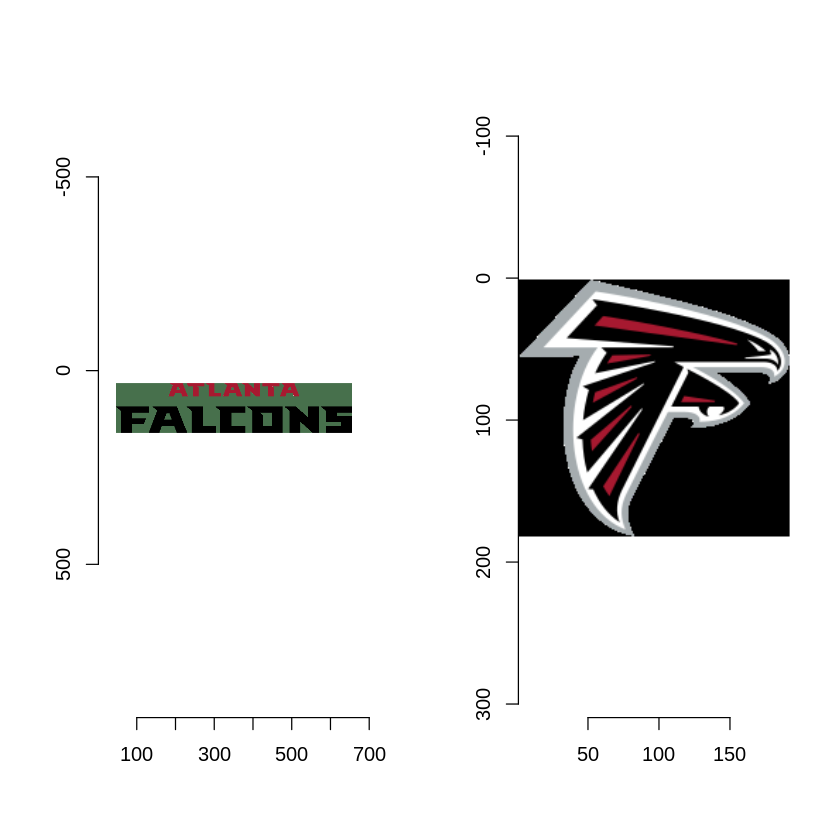

[1] "Buffalo Bills >> BUF"


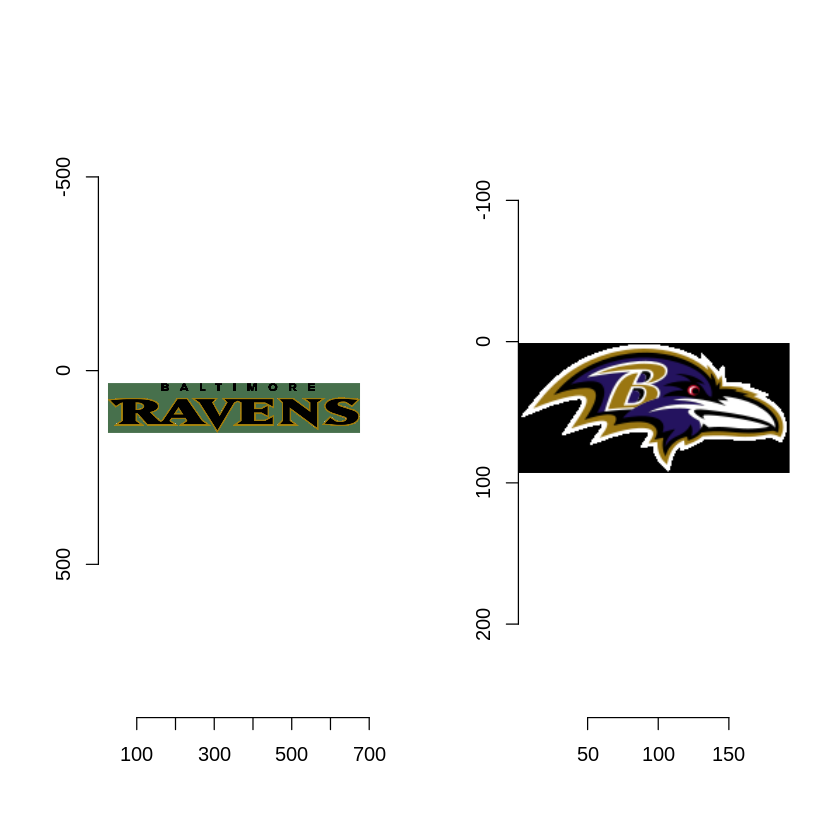

[1] "Carolina Panthers >> CAR"


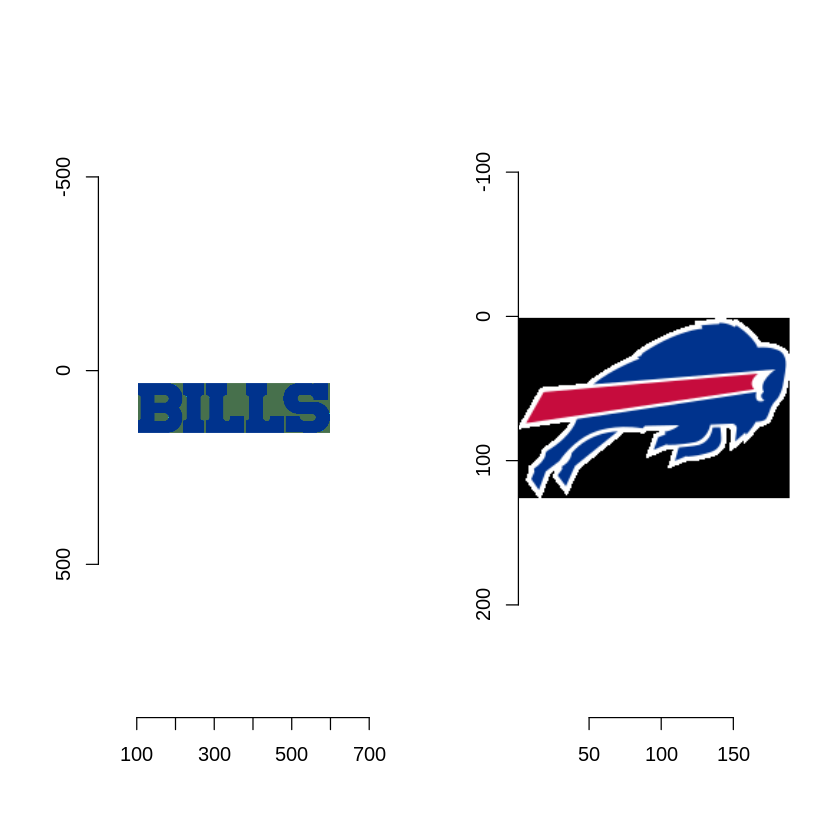

[1] "Chicago Bears >> CHI"


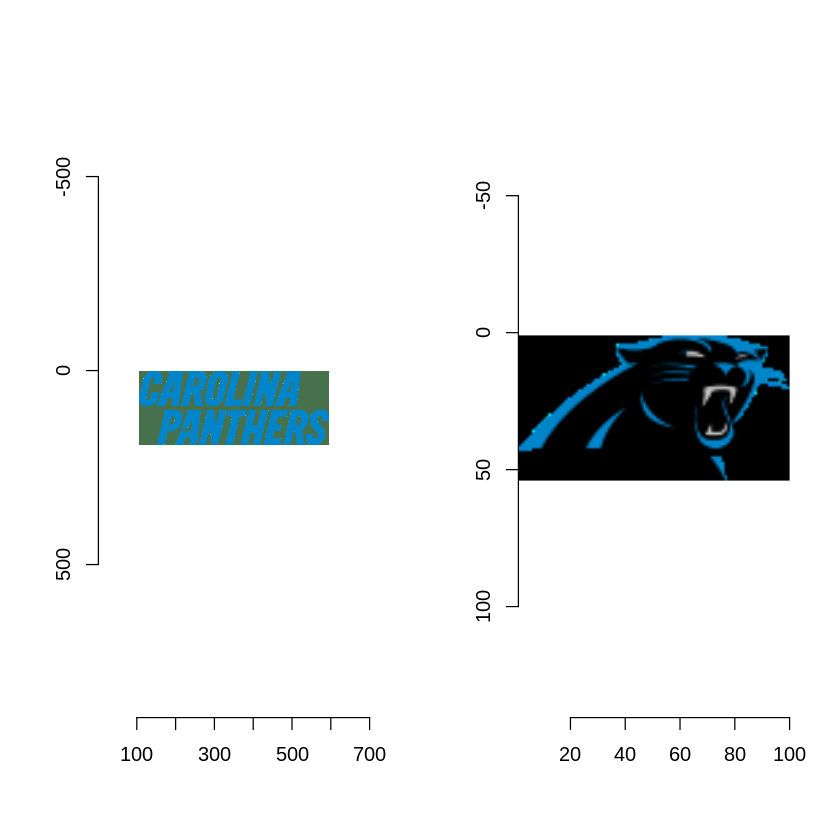

[1] "Cincinnati Bengals >> CIN"


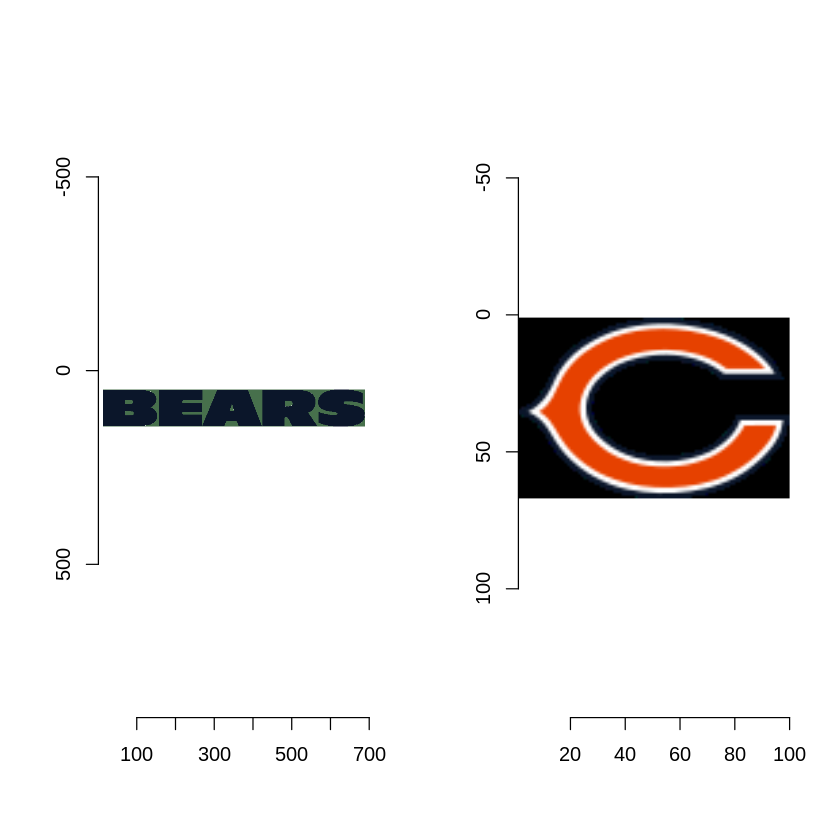

[1] "Cleveland Browns >> CLE"


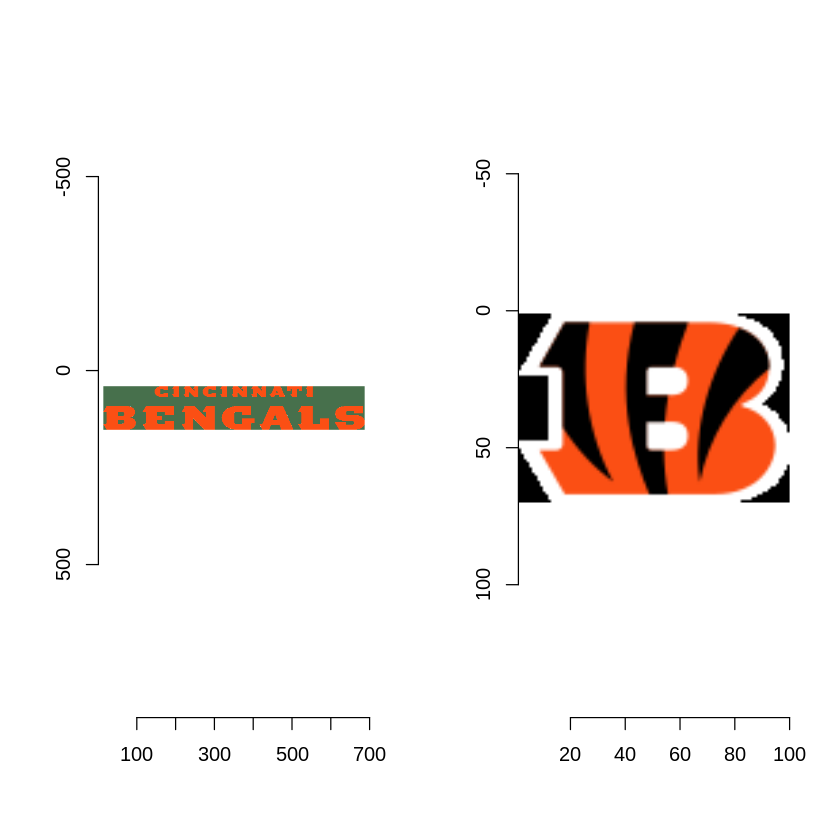

[1] "Dallas Cowboys >> DAL"


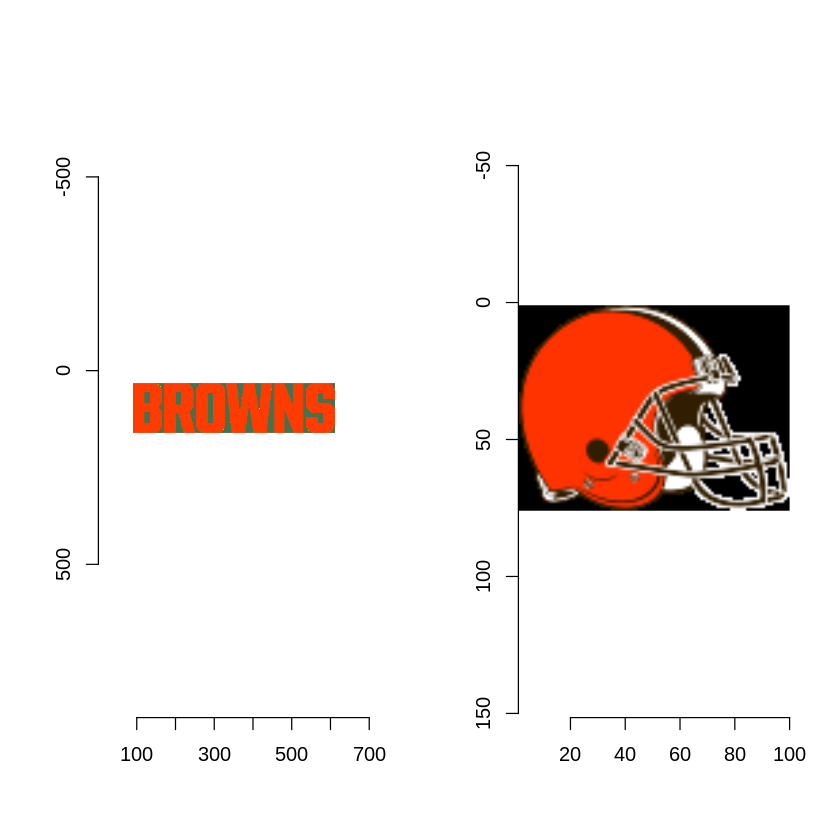

[1] "Denver Broncos >> DEN"


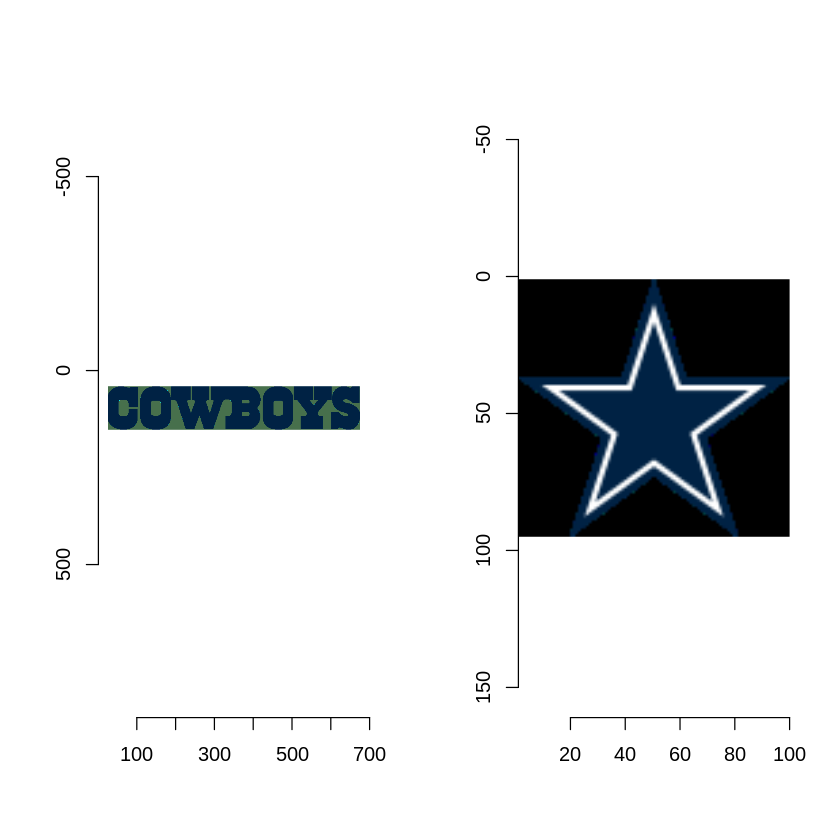

[1] "Detroit Lions >> DET"


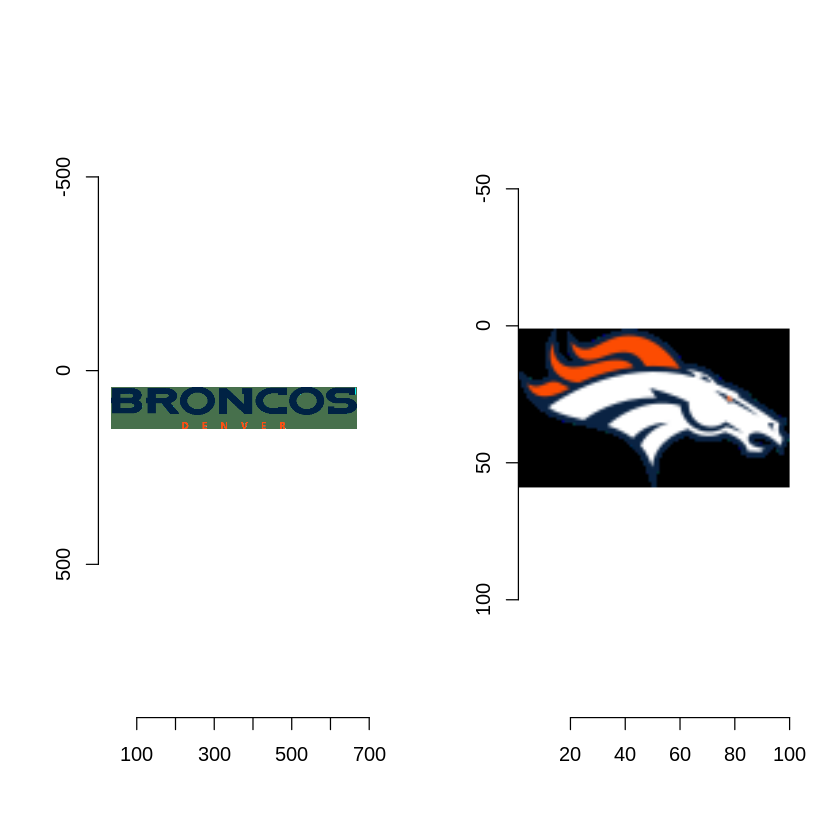

[1] "Green Bay Packers >> GB"


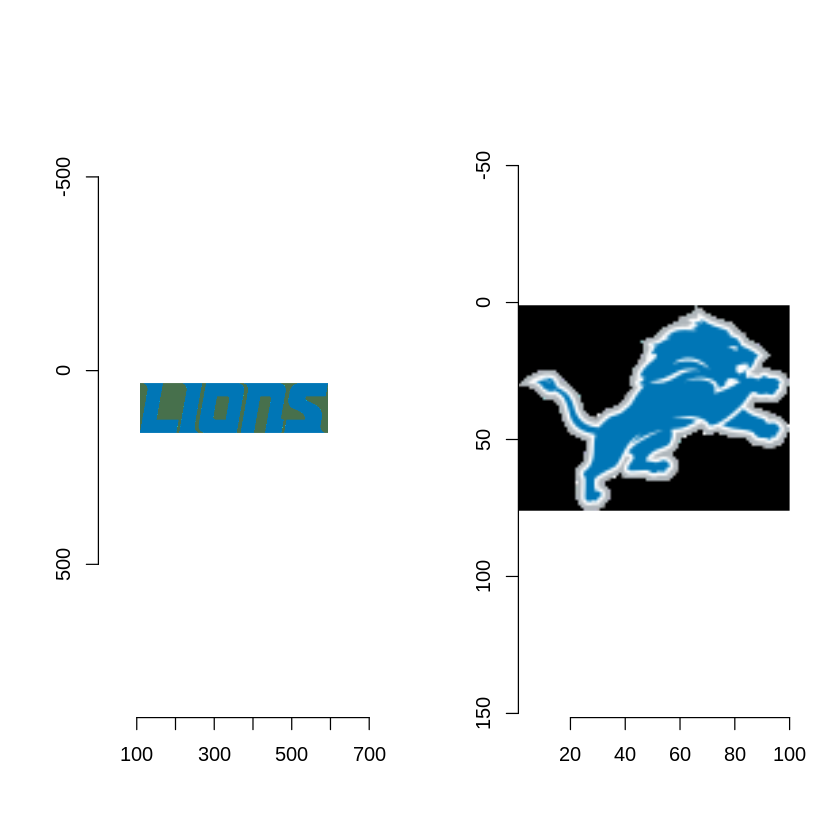

[1] "Houston Texans >> HOU"


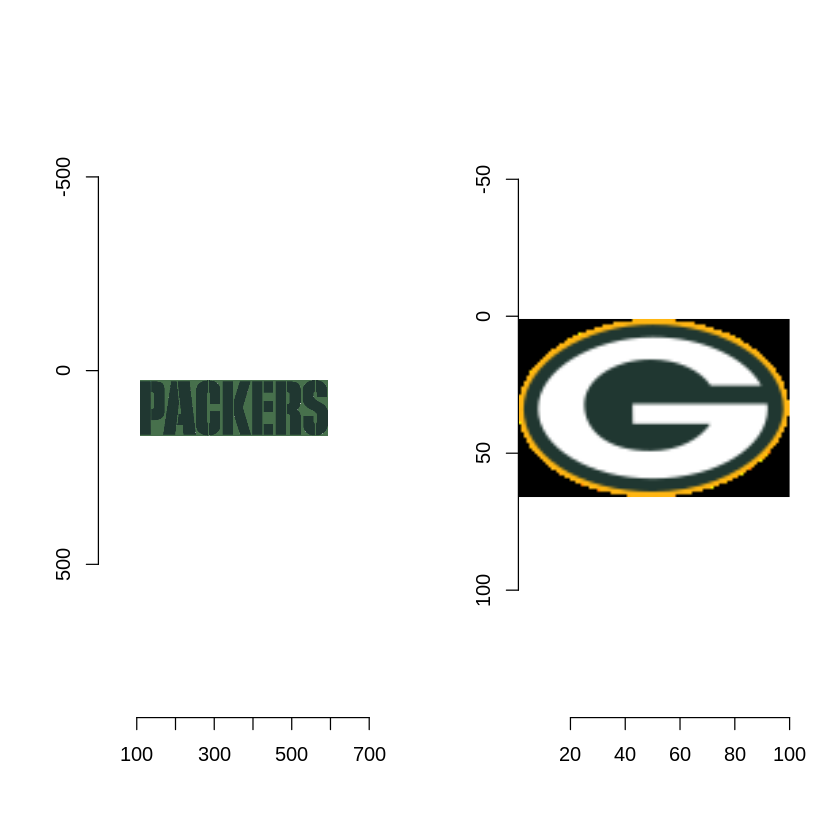

[1] "Indianapolis Colts >> IND"


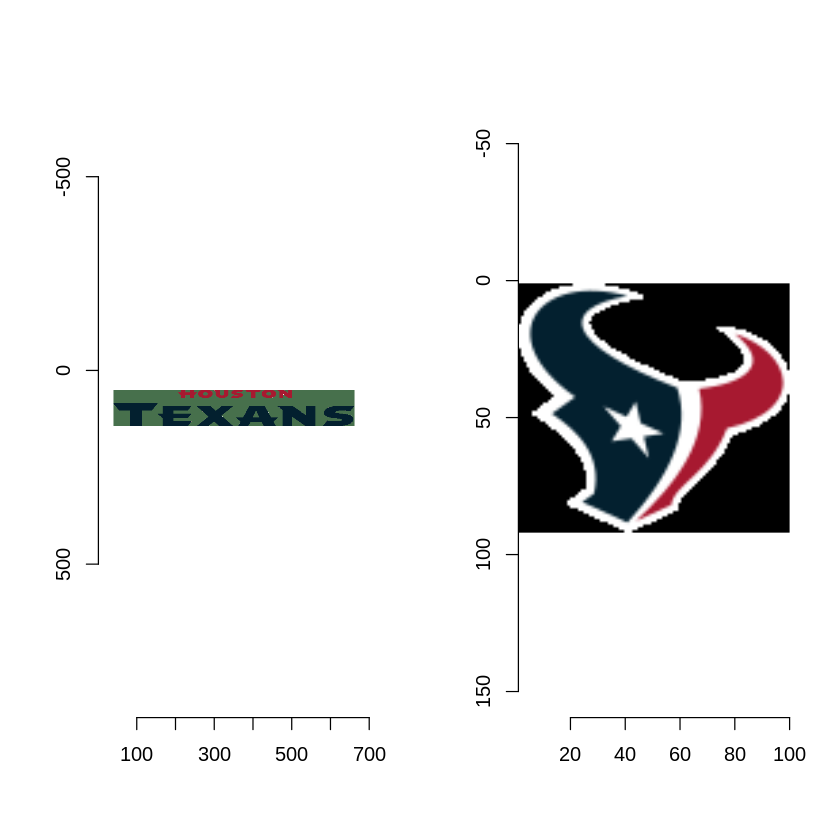

[1] "Jacksonville Jaguars >> JAX"


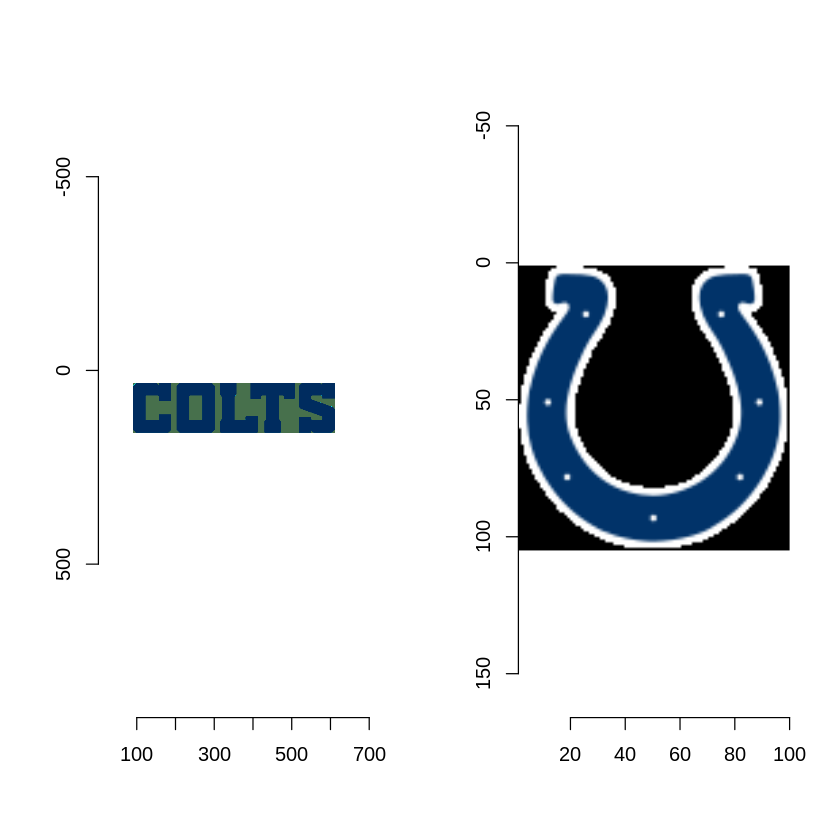

[1] "Kansas City Chiefs >> KC"


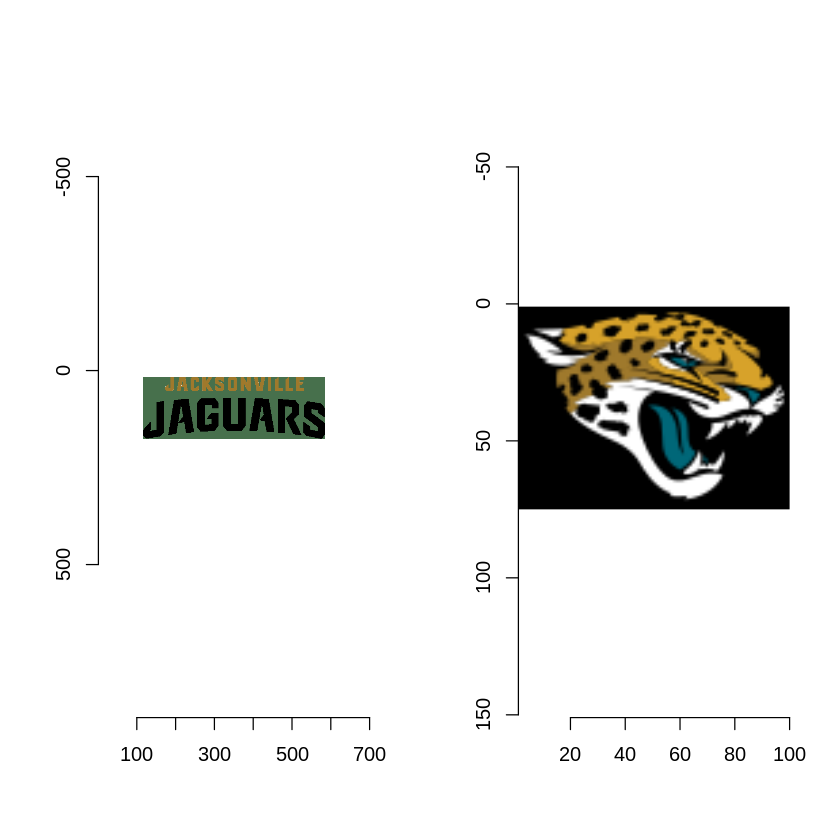

[1] "Los Angeles Rams >> LA"


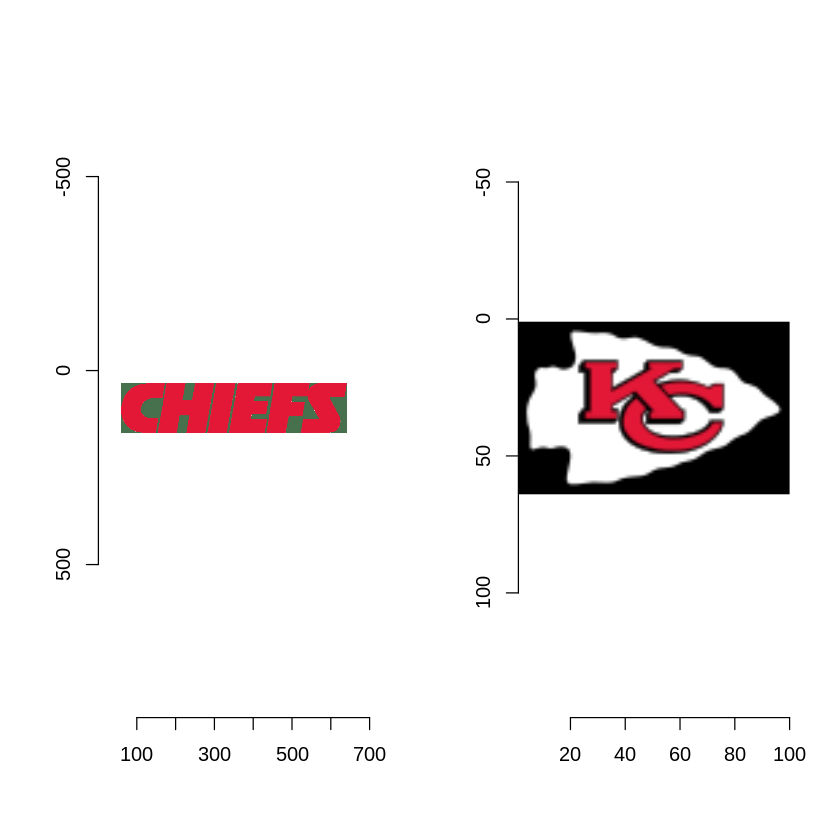

[1] "Los Angeles Chargers >> LAC"


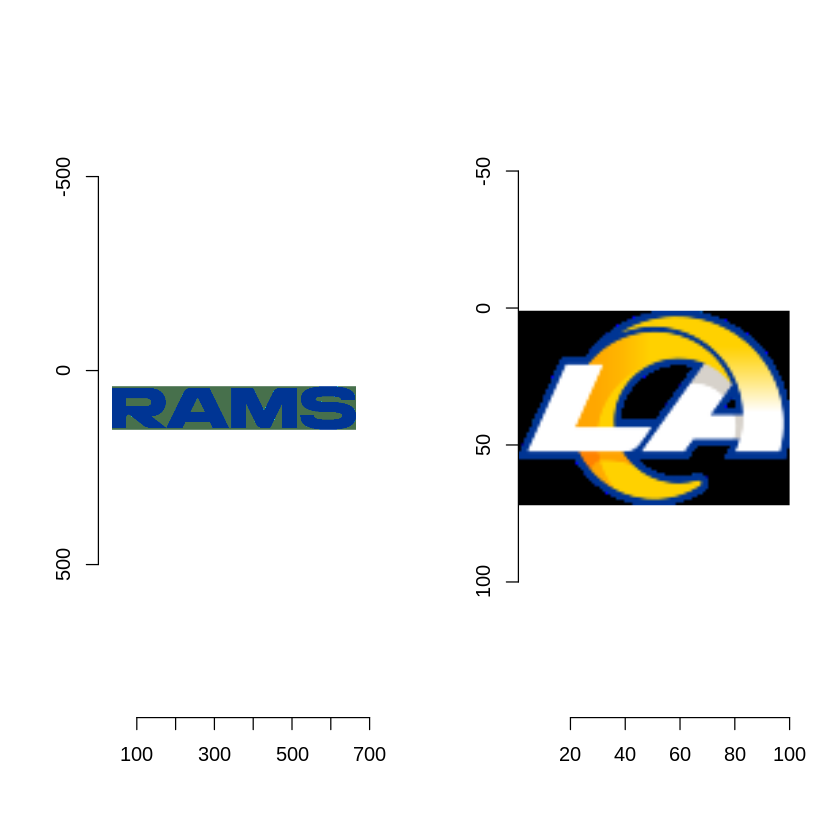

[1] "Los Angeles Rams >> LAR"


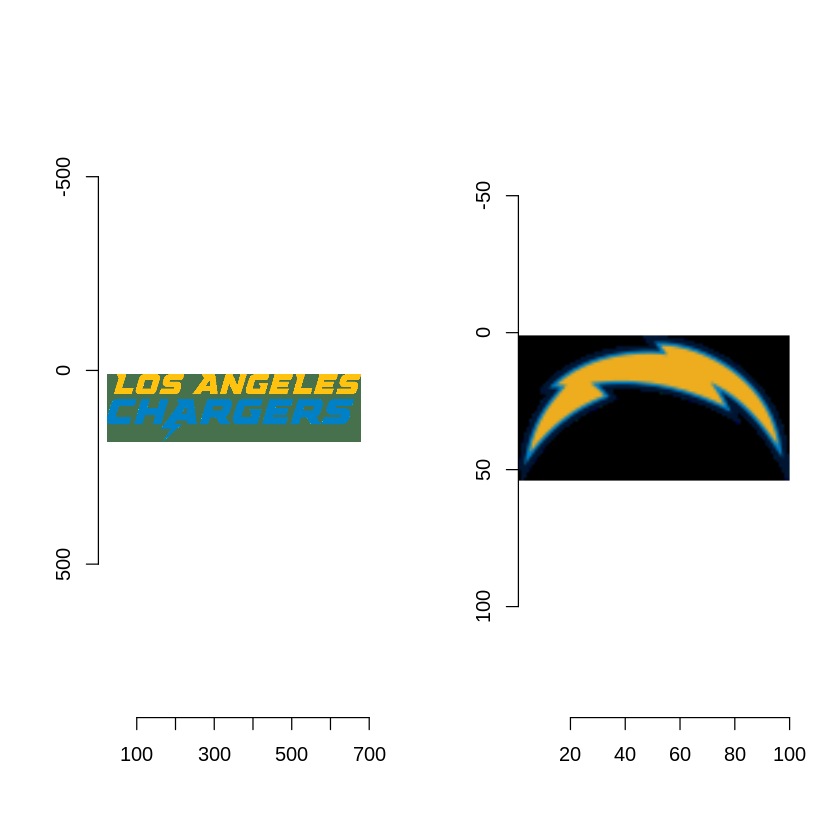

[1] "Las Vegas Raiders >> LV"


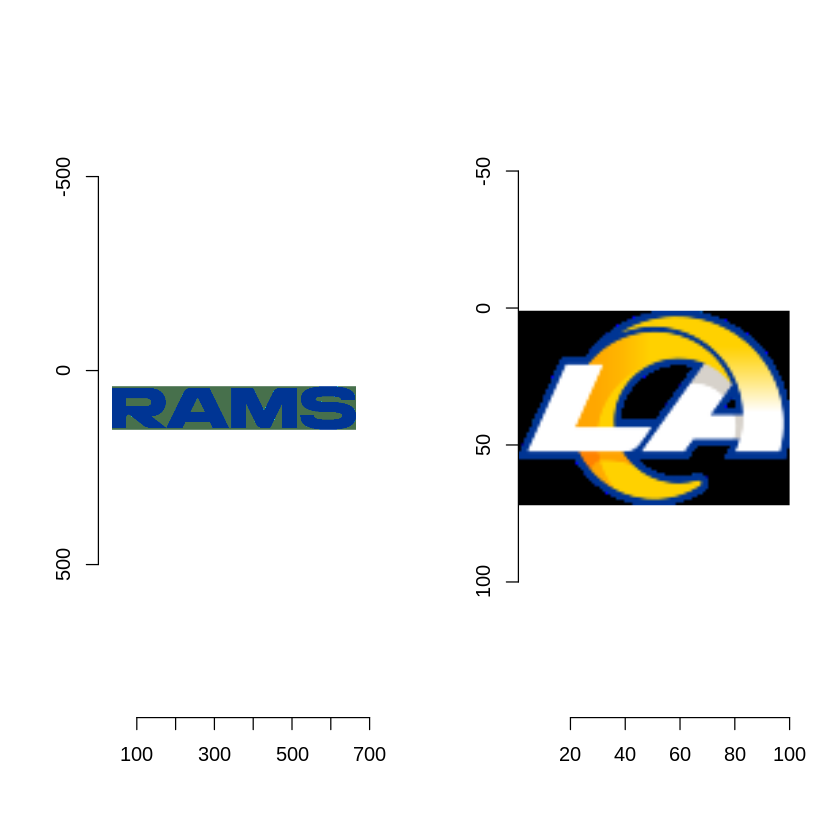

[1] "Miami Dolphins >> MIA"


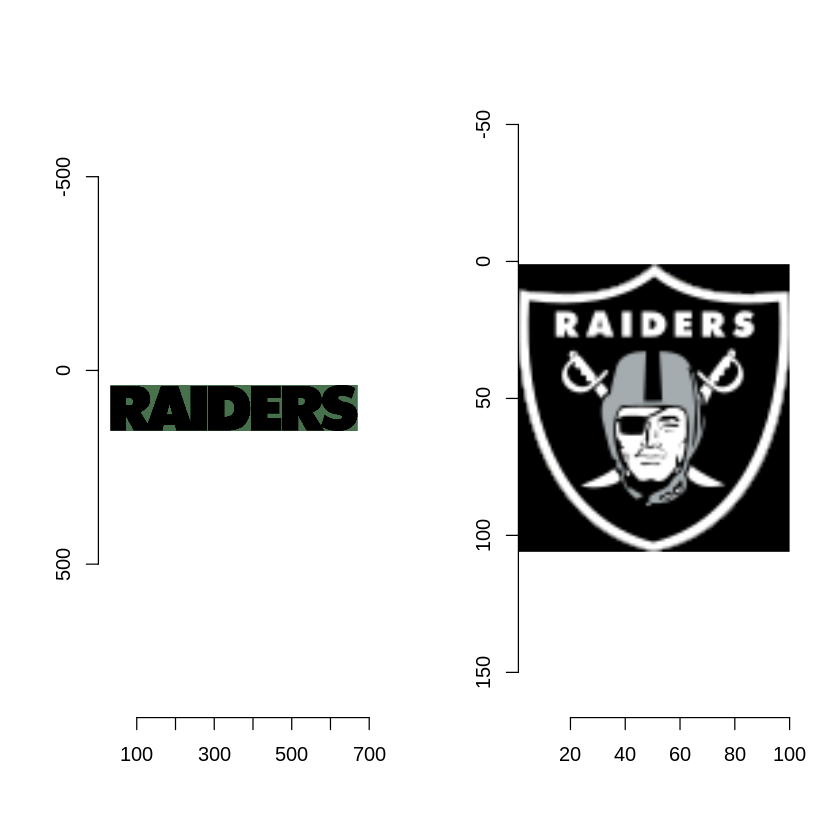

[1] "Minnesota Vikings >> MIN"


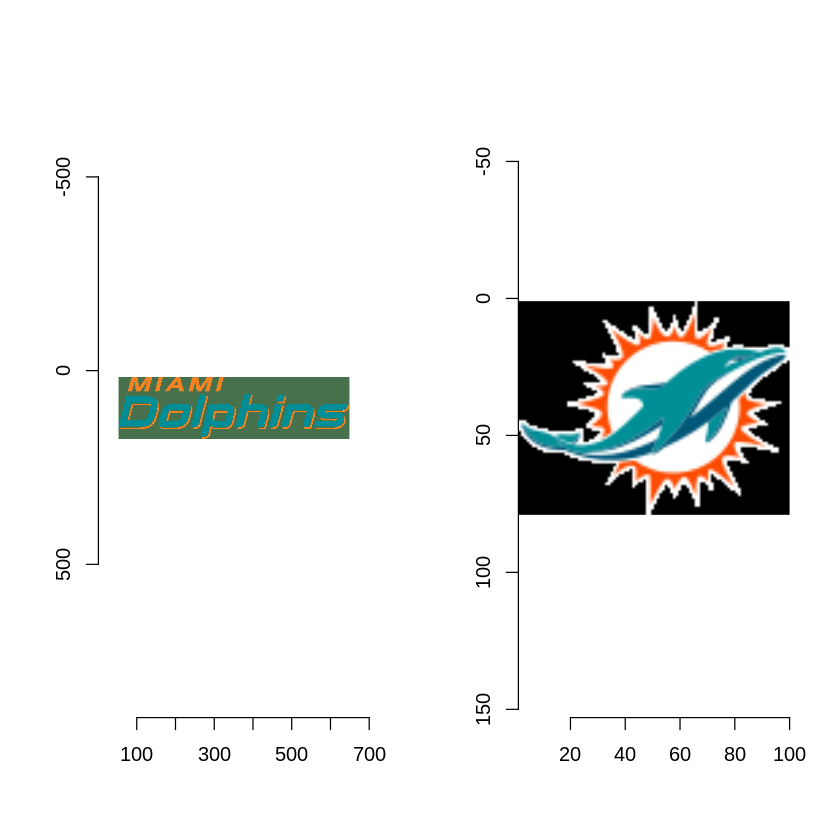

[1] "New England Patriots >> NE"


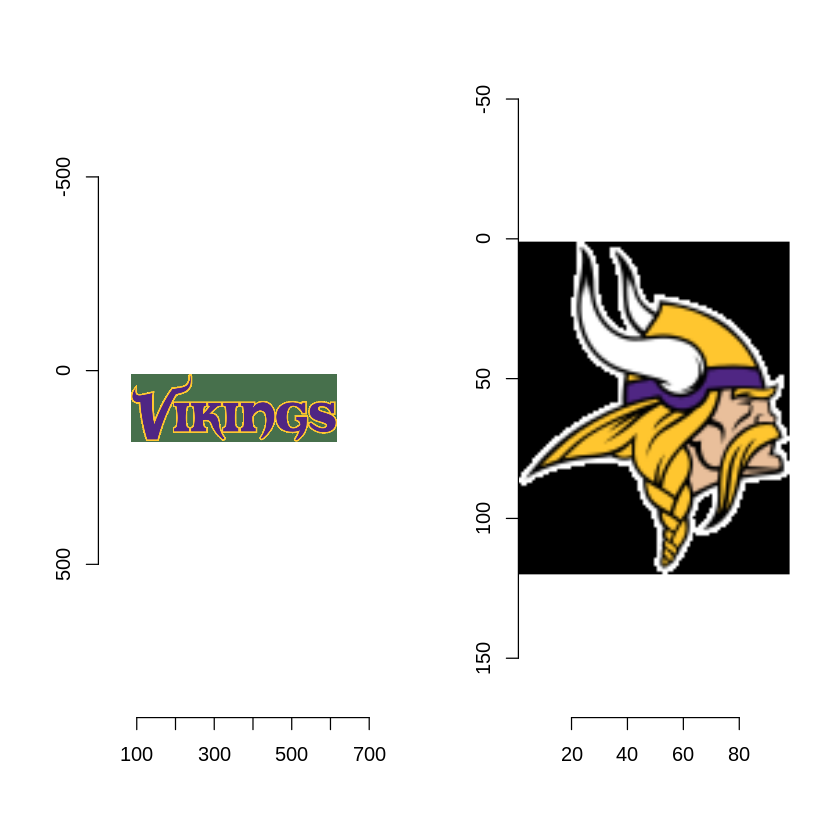

[1] "New Orleans Saints >> NO"


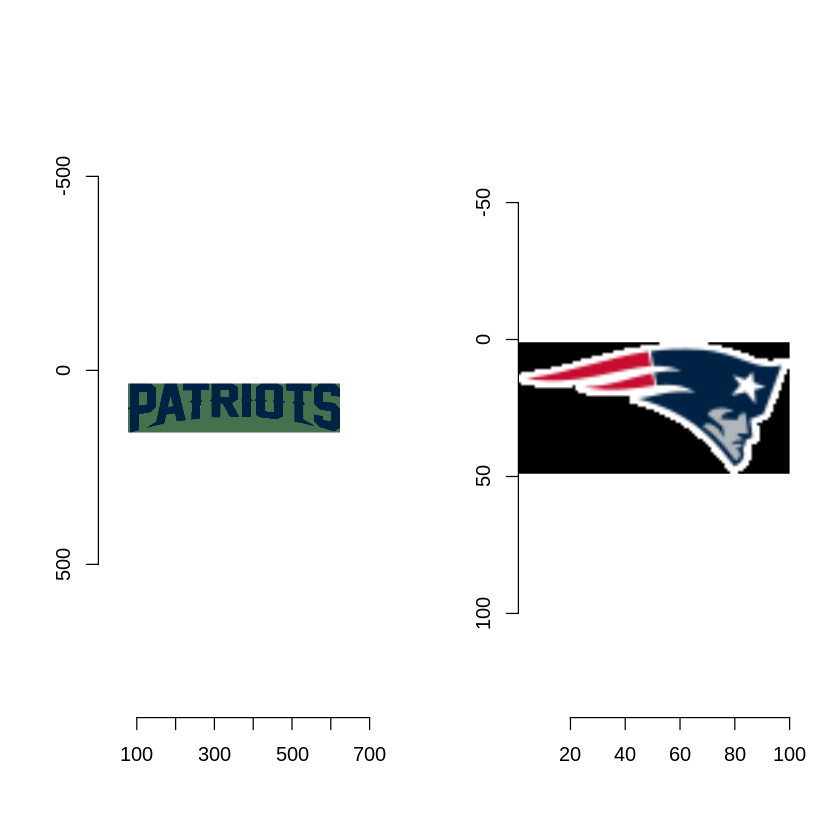

[1] "New York Giants >> NYG"


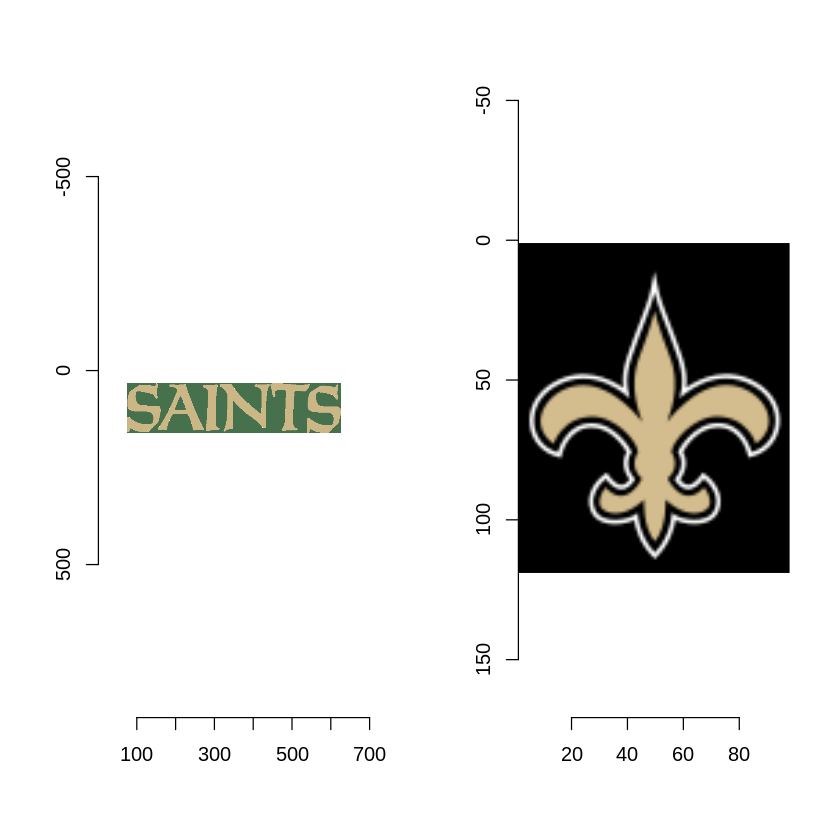

[1] "New York Jets >> NYJ"


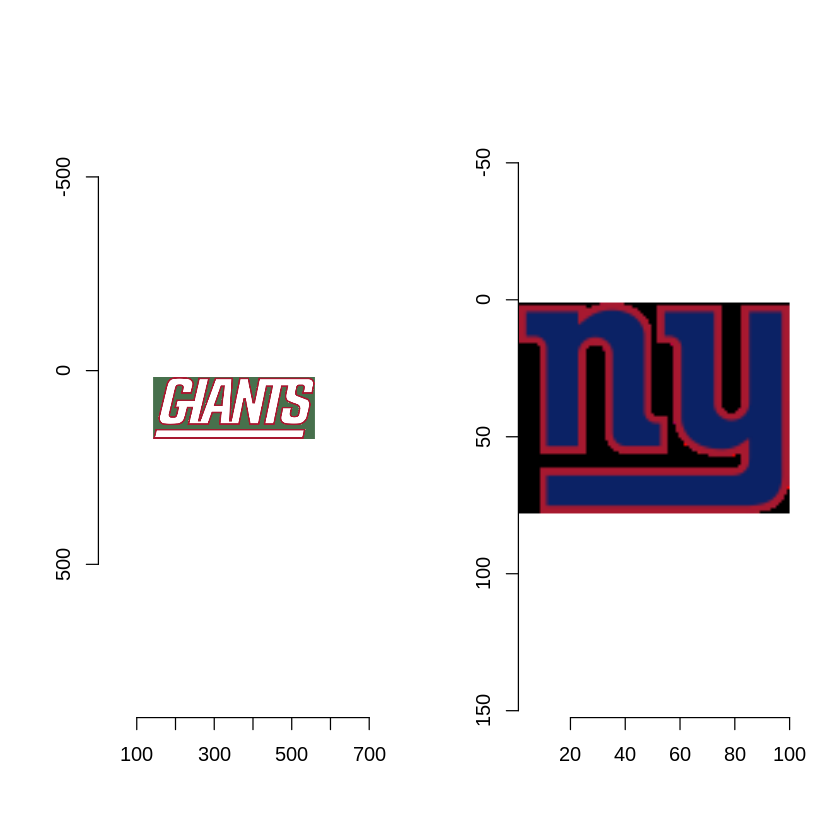

[1] "Oakland Raiders >> OAK"


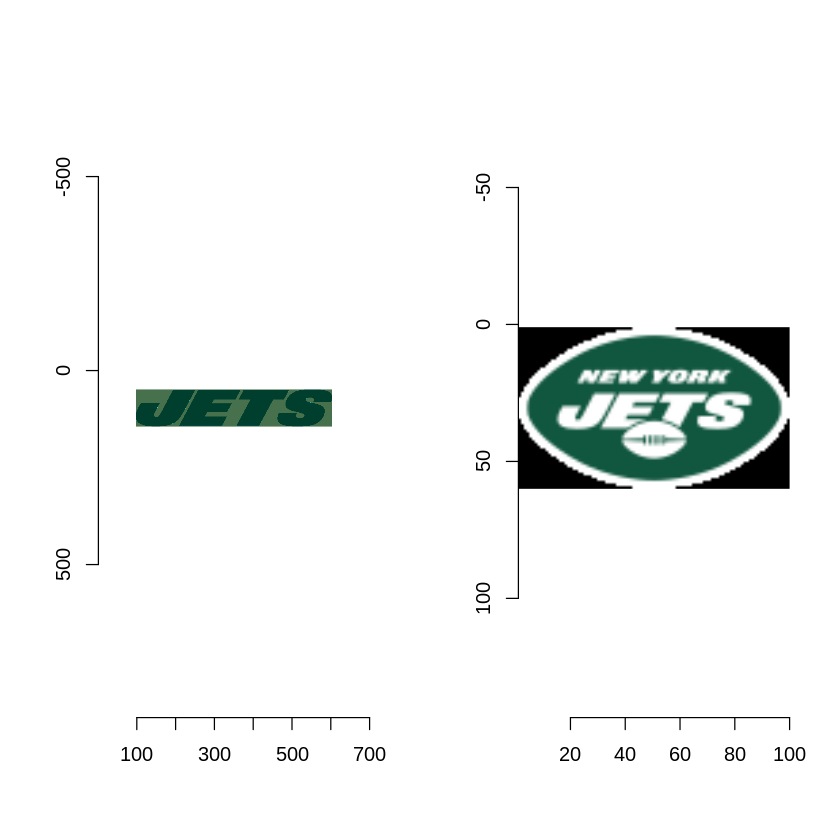

[1] "Philadelphia Eagles >> PHI"


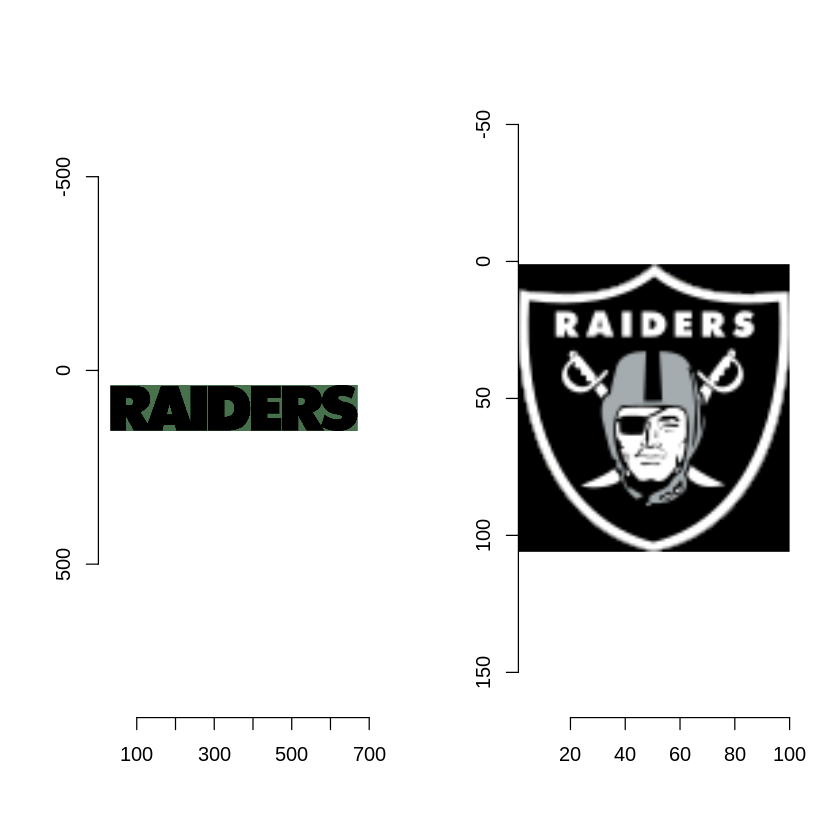

[1] "Pittsburgh Steelers >> PIT"


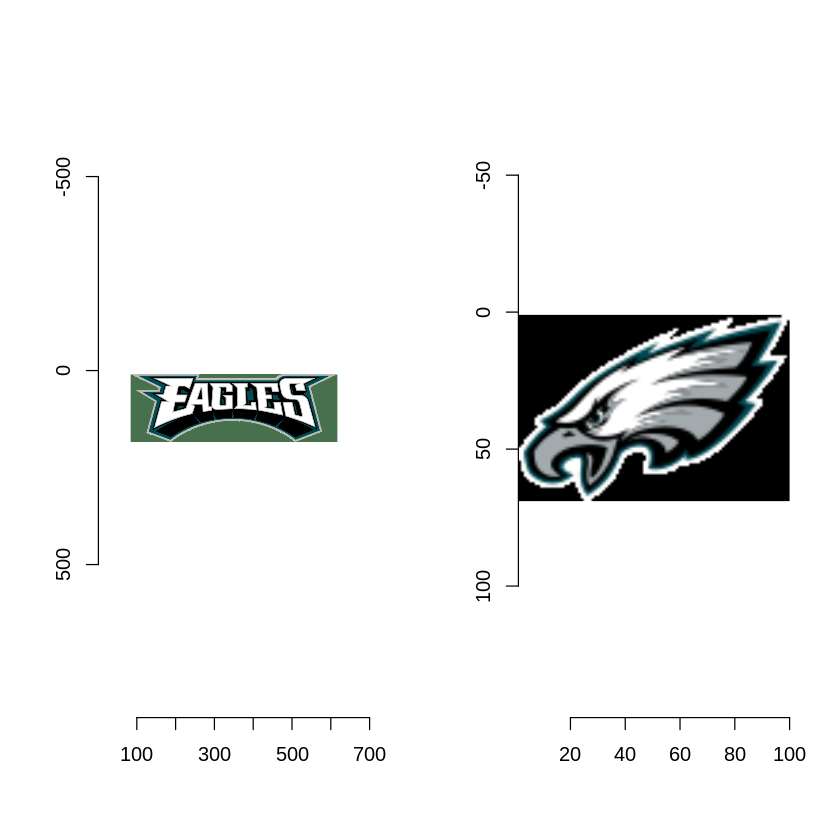

[1] "San Diego Chargers >> SD"


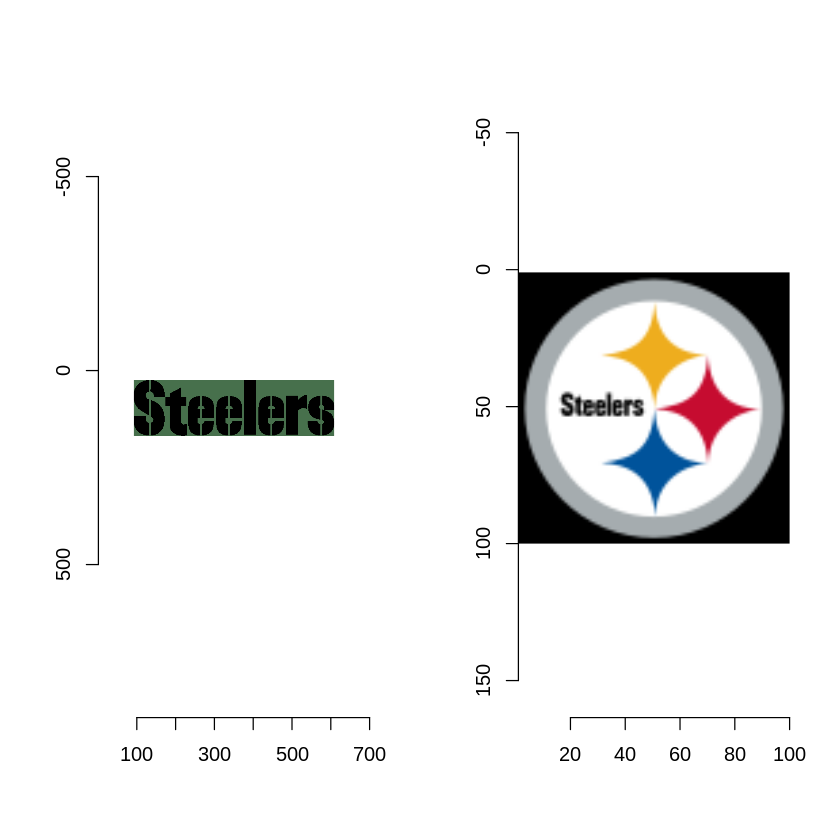

[1] "Seattle Seahawks >> SEA"


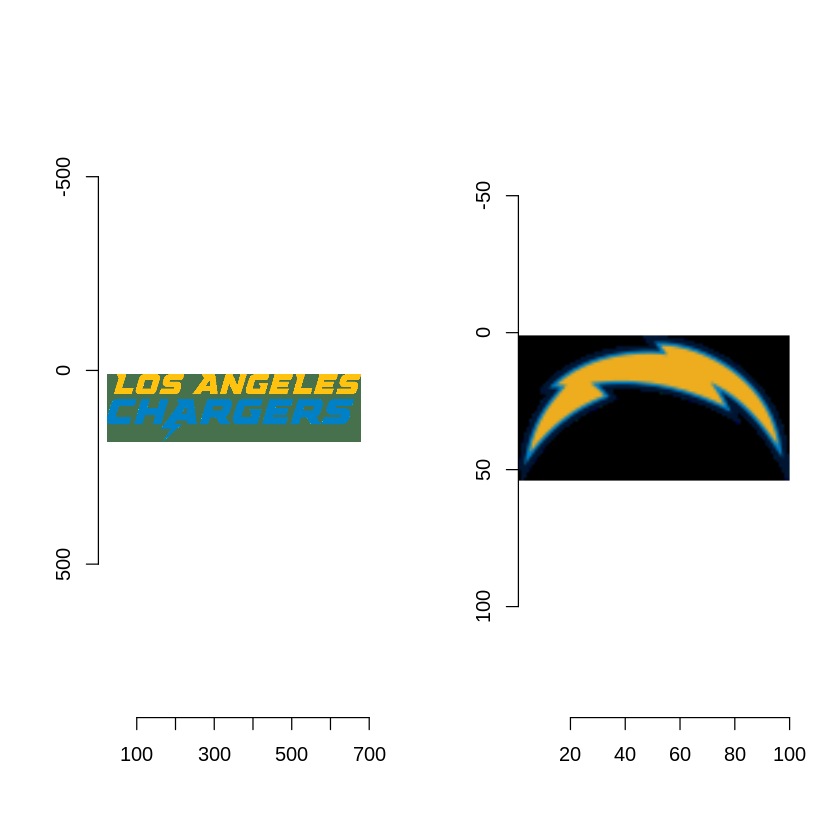

[1] "San Francisco 49ers >> SF"


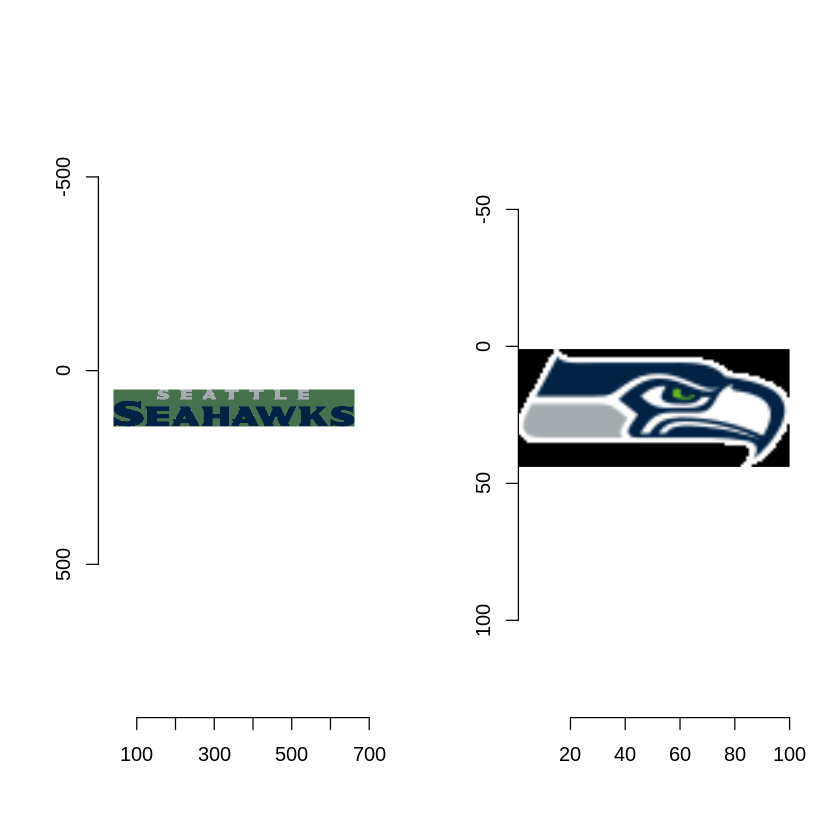

[1] "St. Louis Rams >> STL"


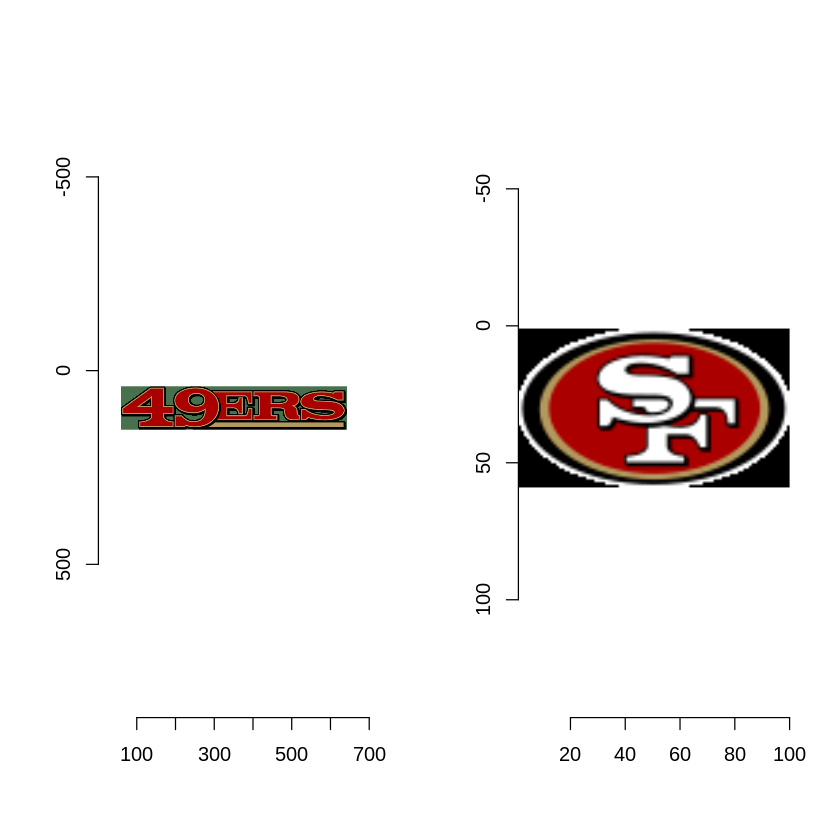

[1] "Tampa Bay Buccaneers >> TB"


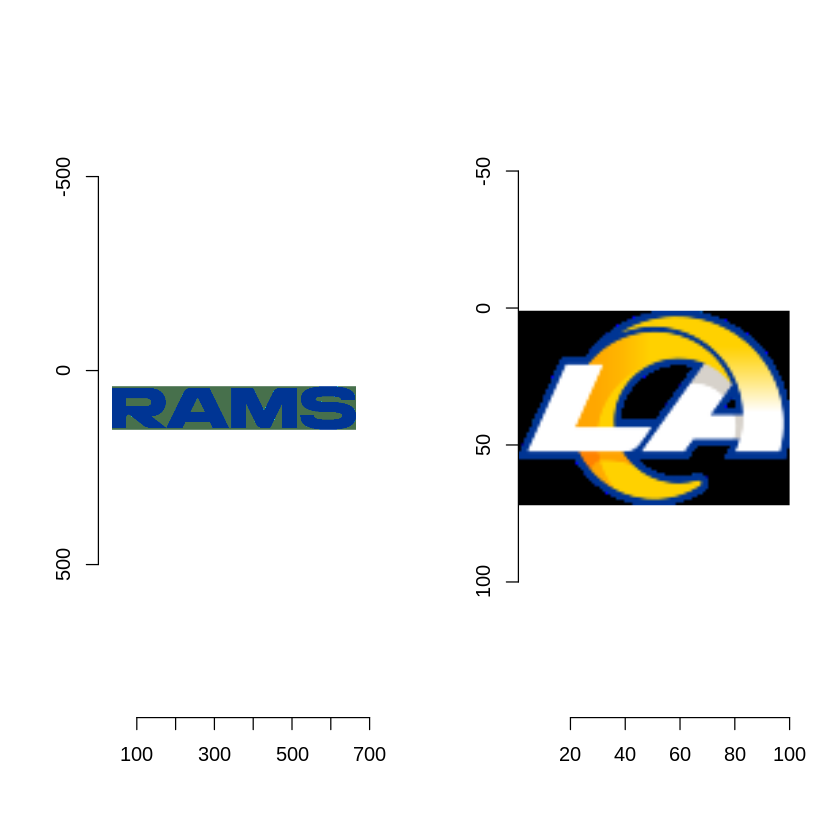

[1] "Tennessee Titans >> TEN"


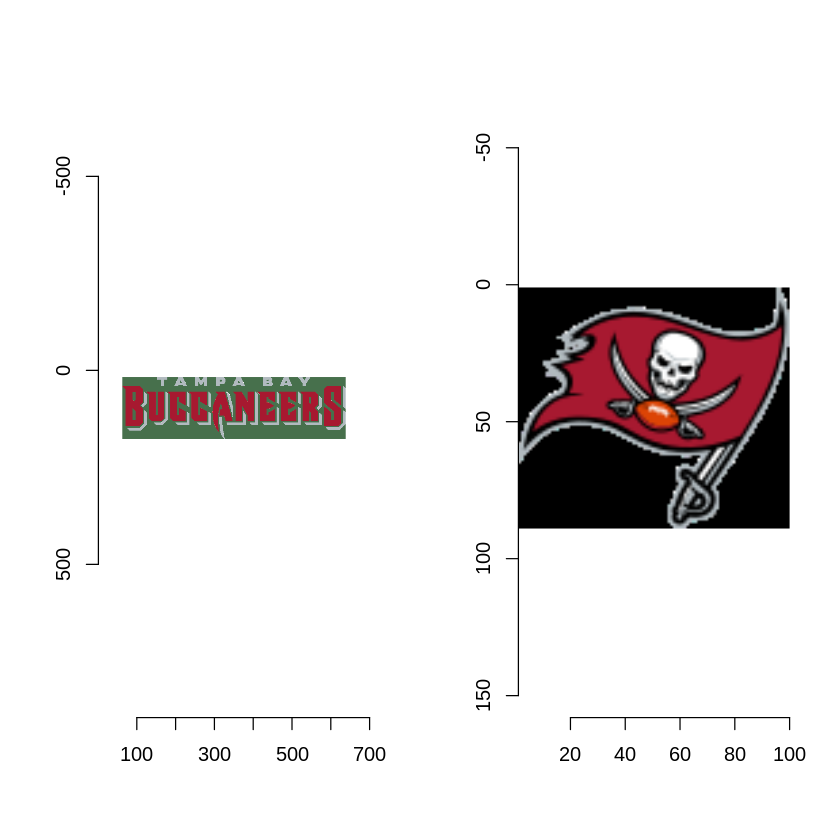

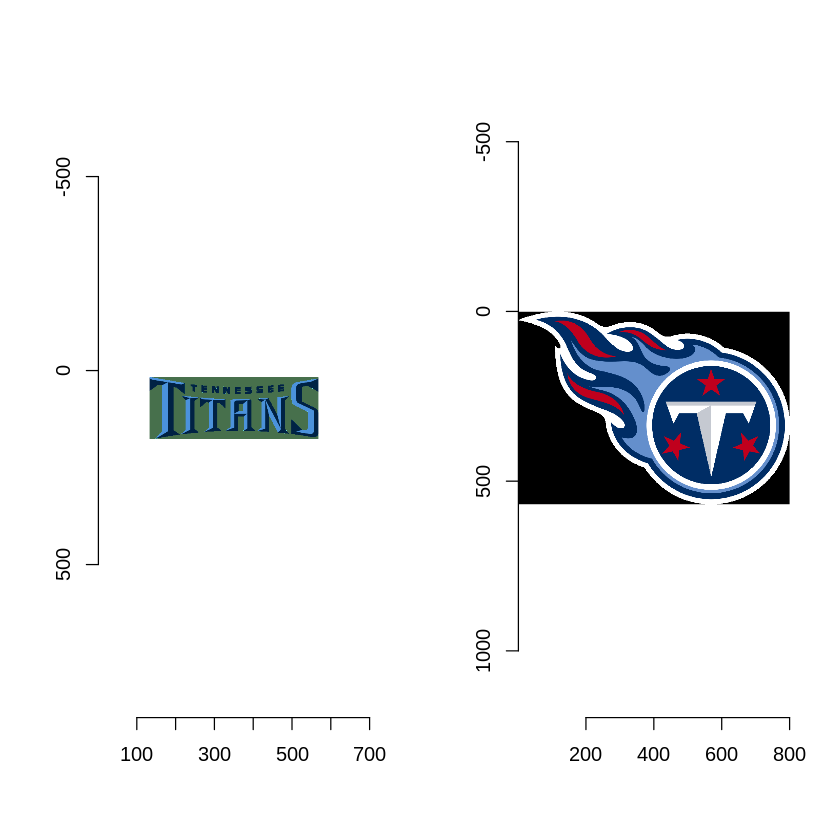

[1] "Washington Football Team >> WAS"


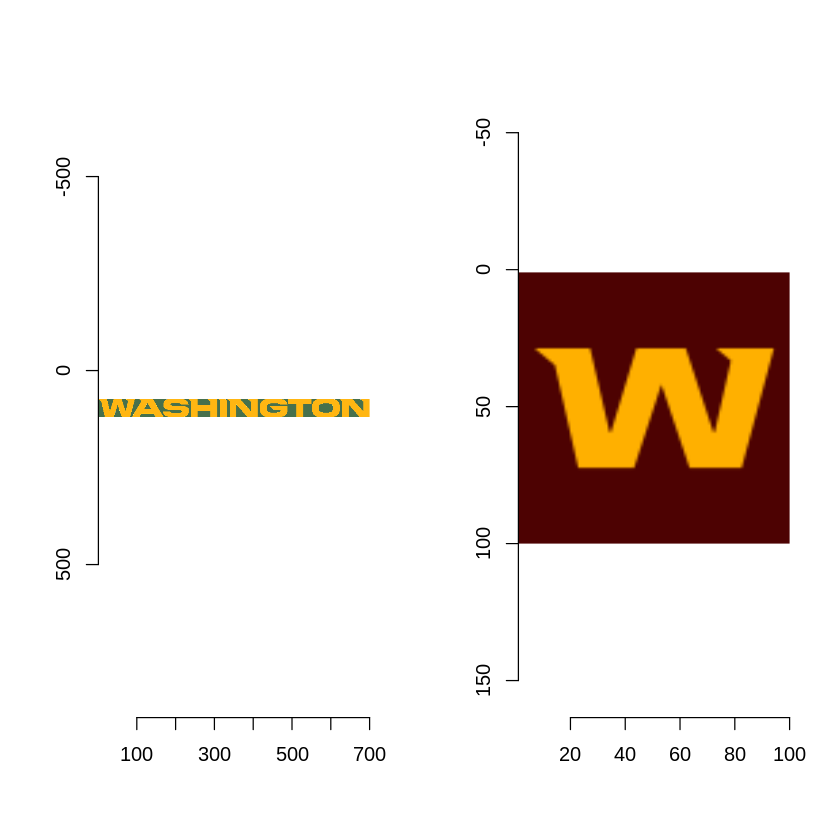

In [13]:
for (i in 1:dim(times)[1]){
    par(mfrow=c(1,2))
    load.image(as.character(times[i,'team_wordmark'])) %>% plot ;   
    load.image(as.character(times[i,'team_logo_wikipedia'])) %>% plot ;   
    print(paste(times[i,'team_name'],times[i,'team_abbr'],sep=' >> '));
    par(mfrow=c(1,1))   
}

Vejam que é possível ter análises bem complexas e elaboradas, como por exemplo este bloco de código abaixo que foi adaptado do *Exemplo 5* de [Get Start with nflfastR](https://www.nflfastr.com/articles/nflfastR.html).

> Não é objetivo desta disciplina de introdução exigir estes elementos. Coloquei aqui apenas para caráter informativo e mostrar que é possível realizar análises tão complexas quanto desejarmos.

In [14]:
#offense <- temporada %>%
#  dplyr::group_by(posteam) %>%
#  dplyr::summarise(off_epa = mean(epa, na.rm = TRUE))

#defense <- temporada %>%
#  dplyr::group_by(defteam) %>%
#  dplyr::summarise(def_epa = mean(epa, na.rm = TRUE))

#logos <- teams_colors_logos %>% dplyr::select(team_abbr, team_logo_espn)

#offense %>%
#  dplyr::inner_join(defense, by = c("posteam" = "defteam")) %>%
#  dplyr::inner_join(logos, by = c("posteam" = "team_abbr")) %>%
#  ggplot2::ggplot(aes(x = off_epa, y = def_epa)) +
#  ggplot2::geom_abline(slope = -1.5, intercept = c(.4, .3, .2, .1, 0, -.1, -.2, -.3), alpha = .2) +
#  ggplot2::geom_hline(aes(yintercept = mean(off_epa)), color = "red", linetype = "dashed") +
#  ggplot2::geom_vline(aes(xintercept = mean(def_epa)), color = "red", linetype = "dashed") +
#  ggimage::geom_image(aes(image = team_logo_espn), size = 0.10, asp = 16 / 9) +
#  ggplot2::labs(
#    x = "Ataque EPA/jogada",
#    y = "Defesa EPA/jogada",
#    caption = "Dados: @nflfastR",
#    title = "2014 NFL Ataque e Defesa EPA por jogada"
#  ) +
#  ggplot2::theme_bw() +
#  ggplot2::theme(
#    aspect.ratio = 9 / 16,
#    plot.title = ggplot2::element_text(size = 12, hjust = 0.5, face = "bold")
#  ) +
#  ggplot2::scale_y_reverse()

ERROR: ignored

### Manipulação de dados  

#### Criação dos *datasets* segmentados por variáveis  

**Pense no seguinte problema**. Sabendo que o time joga tanto em casa (*home_team*) quanto fora de casa (*away_team*), em qual semana o time escolhido ficou de folga. Ou seja, não há entrada de dados na variável *week*.

Para esta atividade de aprofundamento mantenha o time 'SEA' escolhido, mesmo que você explore outras oportunidades posteriormente.

In [15]:
timeEscolhido <- 'SEA'

jogosTimeEscolhido <- temporada %>% filter(home_team == timeEscolhido | away_team == timeEscolhido)

table(jogosTimeEscolhido$away_team, jogosTimeEscolhido$week)

     
        1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  ARI   0   0   0   0   0   0   0   0   0   0 154   0   0   0   0   0   0   0
  CAR   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 167   0
  DAL   0   0   0   0 173   0   0   0   0   0   0   0   0   0   0   0   0   0
  DEN   0   0 203   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  GB  172   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 192
  LA    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163   0   0
  LV    0   0   0   0   0   0   0 196   0   0   0   0   0   0   0   0   0   0
  NE    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  NYG   0   0   0   0   0   0   0   0 172   0   0   0   0   0   0   0   0   0
  SEA   0 167   0 177   0 168 157   0   0 167   0 164 182   0 202   0   0   0
  SF    0   0   0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0
     
       21
  ARI   0
  CAR   0
  DAL   0
  DEN   0
  

Criação dos datasets específicos, segmentando o dataset original, para facilitar a manipulação dos dados e responder às perguntas de negócio.

Utilizando o pacote **Tidyverse**, crie novos conjuntos de dados a partir da função *select*. Garanta que todos datasets estejam fazendo um filtro apenas da semana 1.
> Dica: para o filtro da semana 1, utilize a condição **week==1** na função *filter*

**jogo** com as variáveis *play_id*, *home_team*, *away_team*, *away_score*, *home_score*, *total*

**acoesJogadas** com as variáveis *play_id*, *rush_attempt*, pass_attempt*, *field_goal_attempt*, *down*, *time*, *qtr*, *ydstogo*, *yards_gained* 

**pontuacaoJogadas** com as variáveis *play_id*, *posteam*, *defteam*, *posteam_score*, *defteam_score*, *rush*, *pass*, *name*, *passer*, *rusher*, *receiver*, *interception*, *play_type*, *pass_length*, *air_yards*, *kick_distance*, *drive*, *touchdown*, *td_team*

**descricaoJogadas** com as variáveis *play_id*,*desc*, *passer_player_name*, *passing_yards*, *receiver_player_name*, *punt_returner_player_name*,*name*


> Repare que **TODOS** conjuntos de dados criados possuem a variável *play_id*, porque ela fará o relacionamento entre os conjuntos de dados, caso você queria/precise combinar conjuntos de dados para chegar à uma solução 

In [16]:
jogo <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           home_team, away_team, away_score, home_score, total
          )

In [17]:
acoesJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           rush_attempt, pass_attempt, field_goal_attempt, down, time, qtr, ydstogo, yards_gained
          )

In [18]:
pontuacaoJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           posteam, defteam, posteam_score, defteam_score, rush, pass, passer, rusher, receiver, interception, play_type, pass_length, air_yards, kick_distance, drive, touchdown, td_team, name
          )

In [19]:
descricaoJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           desc, passer_player_name, passing_yards, receiver_player_name, punt_returner_player_name        
          )

In [20]:
head(jogo)
head(acoesJogadas)
head(pontuacaoJogadas)
head(descricaoJogadas)

play_id,home_team,away_team,away_score,home_score,total
<dbl>,<chr>,<chr>,<int>,<int>,<int>
1,SEA,GB,16,36,52
36,SEA,GB,16,36,52
58,SEA,GB,16,36,52
79,SEA,GB,16,36,52
111,SEA,GB,16,36,52
132,SEA,GB,16,36,52


play_id,rush_attempt,pass_attempt,field_goal_attempt,down,time,qtr,ydstogo,yards_gained
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,15:00,1,0,NA
36,0,0,0,NA,15:00,1,0,0
58,1,0,0,1,14:56,1,10,6
79,0,0,0,2,14:30,1,4,0
111,1,0,0,1,14:11,1,10,15
132,1,0,0,1,13:32,1,10,2


play_id,posteam,defteam,posteam_score,defteam_score,rush,pass,passer,rusher,receiver,interception,play_type,pass_length,air_yards,kick_distance,drive,touchdown,td_team,name
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
36,GB,SEA,0,0,0,0,NA,NA,NA,0,kickoff,NA,NA,NA,1,0,NA,NA
58,GB,SEA,0,0,1,0,NA,E.Lacy,NA,0,run,NA,NA,NA,1,0,NA,E.Lacy
79,GB,SEA,0,0,1,0,NA,E.Lacy,NA,0,no_play,NA,NA,NA,1,0,NA,E.Lacy
111,GB,SEA,0,0,1,0,NA,E.Lacy,NA,0,run,NA,NA,NA,1,0,NA,E.Lacy
132,GB,SEA,0,0,1,0,NA,J.Starks,NA,0,run,NA,NA,NA,1,0,NA,J.Starks


play_id,desc,passer_player_name,passing_yards,receiver_player_name,punt_returner_player_name
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GAME,NA,NA,NA,NA
36,4-S.Hauschka kicks 71 yards from SEA 35 to GB -6. 26-D.Harris to GB 13 for 19 yards (57-M.Morgan).,NA,NA,NA,NA
58,(14:56) 27-E.Lacy right tackle to GB 19 for 6 yards (94-K.Williams).,NA,NA,NA,NA
79,"(14:30) 27-E.Lacy left tackle to GB 22 for 3 yards (56-C.Avril, 50-K.Wright). PENALTY on SEA-72-M.Bennett, Defensive Offside, 5 yards, enforced at GB 19 - No Play.",NA,NA,NA,NA
111,(14:11) (Shotgun) 27-E.Lacy up the middle to GB 39 for 15 yards (54-B.Wagner).,NA,NA,NA,NA
132,"(13:32) (No Huddle) 44-J.Starks right guard to GB 41 for 2 yards (31-K.Chancellor, 50-K.Wright).",NA,NA,NA,NA


O uso da função *inner_join* no pacote **Tidyverse** é muito útil para combinar conjunto de dados. Veja, nos exemplos abaixo, como fica a combinação destes *datasets* que foram criados anteriormente.

Pense nos seguintes desafios:

**1)** Combinar o resultado de **pontuacaoJogadas** que tem a informação de quando um time fez *touchdown* (significa que marcou 6 pontos no jogo) e **descricaoJogadas** onde há uma descrição da jogada. Estes conjuntos de dados estão segmentados, cada um deles possui uma parte da informação. Ao combinar estes dois conjuntos de dados é possível ter todas as variáveis juntas como se fossem um único *dataset*. Eles se combinam a partir da variável *play_id*, que é comum entre eles. A partir desta combinação, a manipulação é similar ao que já foi estudado anteriormente.

In [21]:
pontuacaoJogadas %>% #primeiro dataset 
inner_join(descricaoJogadas, by='play_id') %>% #segundo dataset combinando com o primeiro
select(play_id, posteam, touchdown, td_team, desc) %>% #seleção de variáveis
filter(touchdown == 1) #filtro de dados

play_id,posteam,touchdown,td_team,desc
<dbl>,<chr>,<dbl>,<chr>,<chr>
802,GB,1,GB,"(1:30) 30-J.Kuhn left guard for 2 yards, TOUCHDOWN."
1032,SEA,1,SEA,"(13:08) (Shotgun) 3-R.Wilson pass short left to 83-R.Lockette for 33 yards, TOUCHDOWN."
1560,SEA,1,SEA,"(3:46) (Shotgun) 24-M.Lynch up the middle for 9 yards, TOUCHDOWN."
2965,SEA,1,SEA,"(15:00) 24-M.Lynch left tackle for 3 yards, TOUCHDOWN."
3268,GB,1,GB,"(9:37) 12-A.Rodgers pass short right to 18-R.Cobb for 3 yards, TOUCHDOWN."
3662,SEA,1,SEA,"(2:37) 3-R.Wilson pass short left to 40-D.Coleman for 15 yards, TOUCHDOWN."


**2)** Mostrar qual foi o jogador do time da casa e quando ele recebeu o primeiro passe que permitiu correr 5 ou mais jardas.

Para isso, é necessário cobinar 3 conjuntos de dados. No dataset **jogo** é possível retornar qual é o time da casa. Já em **acoesJogadas** é possível saber quantas jardar foram conquistadas (com a variável *yards_gained*). E por fim, em **pontuacaoJogadas** há o nome de quem correu com a bola (variável *rusher*). Vamos ver como fica essa combinação?

In [22]:
jogo %>% #primeiro dataset 
inner_join(acoesJogadas, by='play_id') %>% #segundo dataset combinando com o primeiro
inner_join(pontuacaoJogadas, by='play_id') %>% #terceiro dataset combinando com o primeiro e o segundo
select(play_id, home_team,posteam, rusher, yards_gained, time, qtr ) %>% #seleção de variáveis
filter( posteam == home_team | yards_gained >=5 ) %>% #filtro de dados
head(1) #retorno apenas de 1 linha

play_id,home_team,posteam,rusher,yards_gained,time,qtr
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
58,SEA,GB,E.Lacy,6,14:56,1


#### Desafios de manipulação de dados 

Com base no dataset específico **pontuacaoJogadas**, apresente os dados somente quando ouve *rush* ou *pass* na jogada. Garanta que exista também o nome ou abreviatura do time que está atacando (variável *posteam*), além dos nomes dos jogadores que estão fazendo passe,  correndo ou recebendo a bola (variáveis *passer*, *rusher* e *receiver*)

In [ ]:
# Seu código de resposta vai aqui


Utilizando o subconjunto de dados **acoesJogadas** e **pontuacaoJogadas**, crie uma análise que retorne qual foi o jogador que conquistou mais jardas no terceiro quarto.

In [ ]:
# Seu código de resposta vai aqui



#### Desafio de geração de gráfico  

Crie um gráfico de linhas, mostrando a pontuação de cada time em cada *quarter*. O resultado deve ter duas linhas, uma para cada time, e cada linha será composta pela pontuação de cada um dos *quarters* sendo uma cor para cada time. O eixo X terá os *quarters* e o eixo y terá a pontuação.

In [ ]:
# Seu código de resposta vai aqui


Crie um gráfico de barras empilhada (colunas verticais), utilizando somente as jogadas que tiveram entre 10 e 20 jardas conquistas.
O empilhamento das barras será feito pela quantidade de jardas conquistadas (entre 10 e 20). Mantenha as barras verticais segmentadas por quarter do jogo, e por fim, crie a faceta baseada nos times.


In [ ]:
# Seu código de resposta vai aqui
